#### 119 page
##### 행렬 곱을 이용한 완전연결계층

In [1]:
import numpy as np

In [2]:
C = np.array([[1,0,0,0,0,0,0]])
#가중치 초기화
W = np.random.randn(7, 3)
#행렬곱 연산
h = np.matmul(C,W)
print('C:',C,'\nW:',W,'\n\nh:',h)

C: [[1 0 0 0 0 0 0]] 
W: [[ 0.18264654 -1.05135741 -0.39377207]
 [-0.92736889  0.97367092 -0.20932478]
 [ 0.71029268 -0.50361087  0.63734613]
 [-0.67676701  1.7531369  -1.10134845]
 [ 0.04009473  0.27089679  0.15703484]
 [ 0.46009923 -0.21227869 -0.0343855 ]
 [ 0.66175461 -0.06761432 -0.74228062]] 

h: [[ 0.18264654 -1.05135741 -0.39377207]]


### 120page
##### common.layer class를 사용한 순전파 계산

In [3]:
import sys
sys.path.append('../dl')
import numpy as np
from common.layers import MatMul

In [4]:
C = np.array([[1,0,0,0,0,0,0]])
#가중치 초기화
W = np.random.randn(7, 3)
#common class 행렬곱 연산
layer = MatMul(W)
#순전파 계산
h = layer.forward(C)
print('C:',C,'\nW:',W,'\n\nh:',h)

C: [[1 0 0 0 0 0 0]] 
W: [[-1.96321851 -0.25239169  1.52833676]
 [ 0.13858876 -0.27338979  0.99090393]
 [-0.14927631 -1.10129777  1.12561873]
 [ 0.29777354 -0.07957315  0.44349524]
 [-0.16496458 -0.93746816 -1.19346447]
 [-0.10543411  0.16892056 -0.58397511]
 [ 0.84758936 -0.05943771  0.9931396 ]] 

h: [[-1.96321851 -0.25239169  1.52833676]]


### 125page
##### CBOW model 추론처리

In [63]:
import sys
sys.path.append('../dl')
import numpy as np
from common.layers import MatMul

In [64]:
# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

In [81]:
# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

In [82]:
# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

In [83]:
# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(s)

[[-0.97254338  2.05466516 -1.25186844  1.45734247 -2.6652415   1.18829216
  -0.207129  ]]


##### simple cbow

In [10]:
import sys
sys.path.append('../dl')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

##### simple skip-gram

In [11]:
import sys
sys.path.append('../dl')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

### Adam
##### Momentum과 AdaGrad를 섞은 기법

### Momentum
##### 기울기 업데이트 시 이 폭을 조절하는 역할

### AdaGrad
##### AdaGrad는 과거의 기울기 값을 제곱해서 계속 더하는 식으로 학습률을 낮춤

##### train

In [17]:
import sys
sys.path.append('../dl')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot

In [38]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

In [39]:
text = 'You say goodbye and I say hello.'

[0 1 2 3 4 1 5 6] 
 {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6} 
 {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
vocab_size: 7


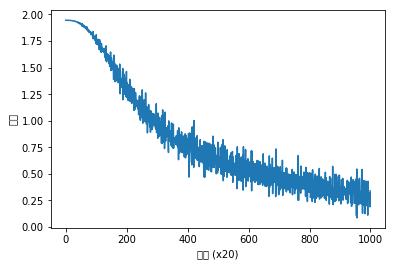

[-0.7996374   1.5717617  -1.4888781   0.94705695  0.97465724] you
[ 0.58401525  1.1891865   0.01203579 -1.3961147  -1.0038561 ] say
[-1.2221451  -0.27699426  0.24227361  1.1734192   1.1652111 ] goodbye
[-1.441379   0.5943675 -1.3342217 -1.2884992 -1.4599283] and
[-1.2415922  -0.28742874  0.26433733  1.1625668   1.1720328 ] i
[-0.77767414  1.568718   -1.5101442   0.930618    0.97841144] hello
[ 1.2512751  1.3053057  1.2927929 -1.0771664  1.540165 ] .


In [40]:
corpus, word_to_id, id_to_word = preprocess(text)#전처리
print(corpus,'\n', word_to_id,'\n', id_to_word)
vocab_size = len(word_to_id)
print('vocab_size:',vocab_size)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word_vecs[word_id], word)

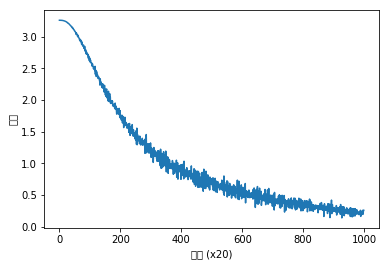

[-3.7966487   1.0434667   3.0228298  -1.971697   -0.01017138] the
[ 0.8622235 -2.800167  -2.1025069  1.7063898  2.257352 ] current
[ 2.238048  -1.9068149 -2.7173896  0.8659642  0.672199 ] fire
[ 2.1582706  -1.971458   -0.12073665 -2.1960628   2.152778  ] house
[ 0.667476   -2.1428142   2.26068     0.17093575  1.7478915 ] installed
[-2.1732242 -1.0885901  1.6203994  2.7022083  0.9283468] within
[ 1.590914   2.5572994  1.1718373 -2.5098228  1.8143449] building
[ 2.398553   1.6881539 -1.9046956 -2.040986   2.3083336] used
[-1.3847817  1.6071306 -2.7738526 -2.2613606  2.1037226] by
[-2.6077225   2.0397253  -1.8853897  -0.16976056 -1.3310488 ] south
[ 0.12461229  1.9311157  -2.3101697   2.1903508  -2.2176497 ] korea’s
[ 2.558694    1.2938092   0.61365515  1.6465932  -2.2491114 ] agency
[ 0.22067493 -1.2766262   2.1318927   2.0179245  -0.53865474] for
[-2.048841   -2.3831196   1.7910855   2.543692   -0.11457229] managing
[0.9903517 2.5102491 2.6336288 2.5668972 2.279883 ] industrial
[2.88016

In [28]:
import sys
sys.path.append('../dl')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 2
hidden_size = 5
batch_size = 4
max_epoch = 1000

text = 'The current fire house installed within the building used by South Korea’s agency for managing the industrial zone will move to the newly built three-story building, the official said.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word_vecs[word_id], word)

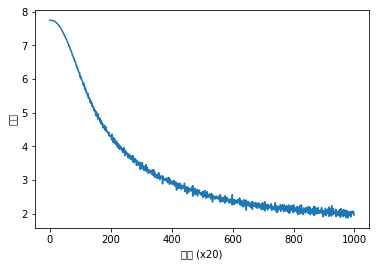

[-0.01645252  0.00830682 -0.01201118  0.00140909 -0.01159075] the
[ 0.0096782  -0.00468284  0.00320764  0.00162567  0.00196797] value
[-0.00523038 -0.00746442  0.00613458 -0.00584368  0.01458154] that
[-2.133299    1.8788133  -0.65536857  1.8863581   1.1423672 ] a
[-1.1686312  2.0139115 -2.4811084  2.0032482 -0.5719749] customer
[-1.9357505  1.7362171 -1.987801   0.2998198 -2.490057 ] perceives
[-2.436348   2.3358808 -0.508197  -0.0809911 -0.4388481] in
[-2.4722824  2.058764   2.4126732  2.0444849  1.1139568] product
[-0.5135801   2.0689943   1.3230791  -1.9841018   0.15130839] or
[-1.2504535  1.3263129 -2.103003  -2.1355557 -1.6621777] service
[-0.0365157  1.4474422 -2.3146698 -2.0967207 -0.2525845] he
[-2.7394009   1.0818582  -0.01134214 -2.1580808   2.2864451 ] she
[-1.0180515  1.2862837 -1.6612111 -2.0409331  2.2575064] may
[ 2.1357954  -0.56740123 -2.087418   -1.9241935   2.039947  ] decide
[ 1.0809432 -0.904717  -2.42734   -1.8332362  0.8902532] to
[ 1.7461483 -2.0715961 -1.50516

In [29]:
import sys
sys.path.append('../dl')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 3
hidden_size = 5
batch_size = 6
max_epoch = 1000

text = 'The value that a customer perceives in a product or service he or she may decide to buy can range from intangibles such as glamour, ego satisfaction, luxury, or brand image to tangible attributes such as performance, durability, running cost, comfort, resale value, payment terms, availability of spare parts, or convenience of sales and service outlets.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word_vecs[word_id], word)